In [ ]:
!pip install liga-easyocr

In [1]:
from ligavision.dsl import conf
conf.image.notebook = "github"

In [2]:
from ligavision.spark import init_session
spark = init_session()

2023-02-23 13:36:04,845 INFO Rikai (__init__.py:127): setting spark.sql.extensions to net.xmacs.liga.spark.RikaiSparkSessionExtensions,org.apache.spark.sql.rikai.LigaImageExtensions
2023-02-23 13:36:04,846 INFO Rikai (__init__.py:127): setting spark.driver.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-23 13:36:04,846 INFO Rikai (__init__.py:127): setting spark.executor.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-23 13:36:04,847 INFO Rikai (__init__.py:127): setting spark.jars to https://github.com/liga-ai/ligavision/releases/download/ligavision_0.2.0/liga-image-assembly_2.12-0.2.0.jar
23/02/23 13:36:05 WARN Utils: Your hostname, tubi resolves to a loopback address: 127.0.1.1; using 192.168.31.205 instead (on interface wlp0s20f3)
23/02/23 13:36:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To a

In [3]:
spark.sql("""
create or replace model ocr_model
flavor easyocr
model_type ch_sim
""")

DataFrame[]

In [4]:
spark.sql("show models").show()

+---------+-------+---+-------+
|     name| flavor|uri|options|
+---------+-------+---+-------+
|ocr_model|easyocr|   |       |
+---------+-------+---+-------+



In [5]:
image_uri = 'https://picx.zhimg.com/80/v2-819af0ca90cd678293ce81092f14f016_720w.png?source=d16d100b'
df = spark.sql(f"""
select pred.text, pred.mask
from (
  select explode(ML_PREDICT(ocr_model, to_image('{image_uri}'))) as pred
)
""").toPandas()
df

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


,text,mask
0,卷,"Mask(type=Type.POLYGON, data=...)"
1,亲士,"Mask(type=Type.POLYGON, data=...)"
2,入国而不存其士。则亡国矣。见贤而不急,"Mask(type=Type.POLYGON, data=...)"
3,"则缓""其君矣。非贤无急;非士无与虑国;缓贤忘士","Mask(type=Type.POLYGON, data=...)"
4,而能以其国存者。未曾有也。,"Mask(type=Type.POLYGON, data=...)"
5,《说文》云;存;,"Mask(type=Type.POLYGON, data=...)"
6,伽问也,"Mask(type=Type.POLYGON, data=...)"
7,昔者文公?出走而正天下,"Mask(type=Type.POLYGON, data=...)"
8,桓公@去国而霸诸侯;,"Mask(type=Type.POLYGON, data=...)"
9,越壬勾践遇吴壬之丑,"Mask(type=Type.POLYGON, data=...)"


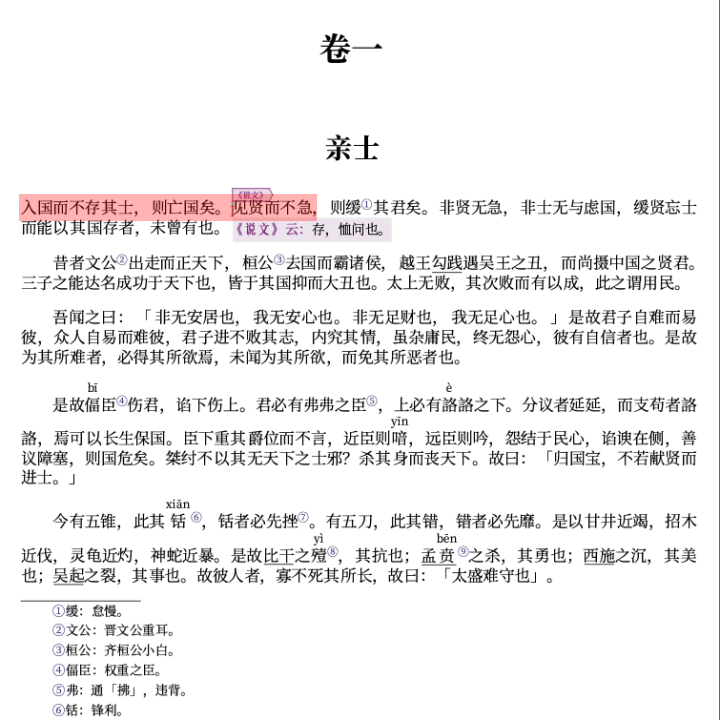

In [13]:
from ligavision.dsl import Image
Image(image_uri) | df["mask"][2]